In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(187).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(73).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(158).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(69).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(66).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(92).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(231).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(200).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patie

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
train_dir = '/kaggle/input/ecg-analysis/ECG_DATA/train/'
test_dir = '/kaggle/input/ecg-analysis/ECG_DATA/test/'

In [4]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [5]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
ECG Images of Patient that have abnormal heartbeat (233x12=2796): 699 images
ECG Images of Patient that have History of MI (172x12=2064): 516 images
Normal Person ECG Images (284x12=3408): 852 images
ECG Images of Myocardial Infarction Patients (240x12=2880): 956 images

Test Subfolders and Image Counts:
ECG Images of Patient that have abnormal heartbeat (233x12=2796): 233 images
ECG Images of Patient that have History of MI (172x12=2064): 172 images
Normal Person ECG Images (284x12=3408): 284 images
ECG Images of Myocardial Infarction Patients (240x12=2880): 239 images


In [6]:
def plot_images_from_subfolders(directory, subfolders):
    for folder in subfolders:
        folder_path = os.path.join(directory, folder)
        image_files = [file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))][:10]  # Get 10 images
        print(f"\nShowing 10 images from {folder}:")

        plt.figure(figsize=(20, 10))
        for i, image_file in enumerate(image_files):
            img_path = os.path.join(folder_path, image_file)
            img = mpimg.imread(img_path)
            plt.subplot(2, 5, i+1)
            plt.imshow(img)
            plt.axis('off')  

        plt.show()


Showing 10 images from ECG Images of Patient that have abnormal heartbeat (233x12=2796):


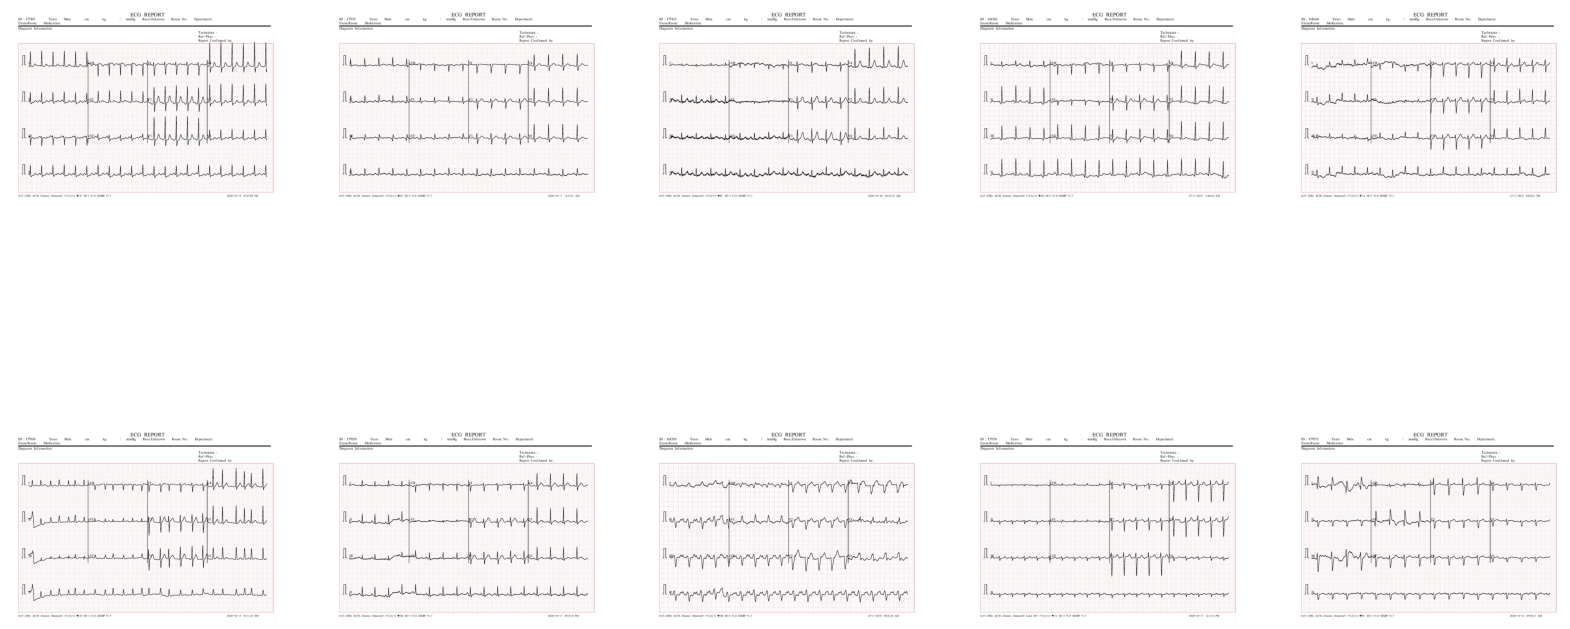


Showing 10 images from ECG Images of Patient that have History of MI (172x12=2064):


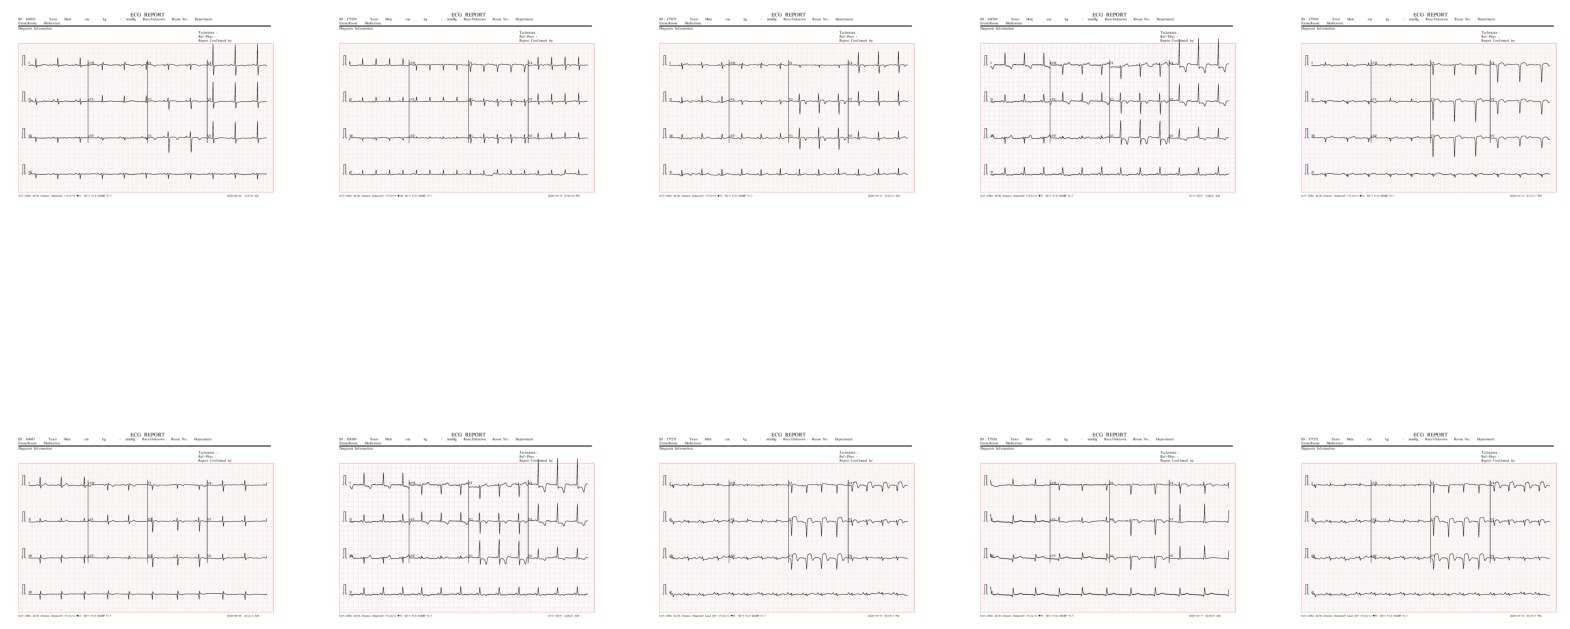


Showing 10 images from Normal Person ECG Images (284x12=3408):


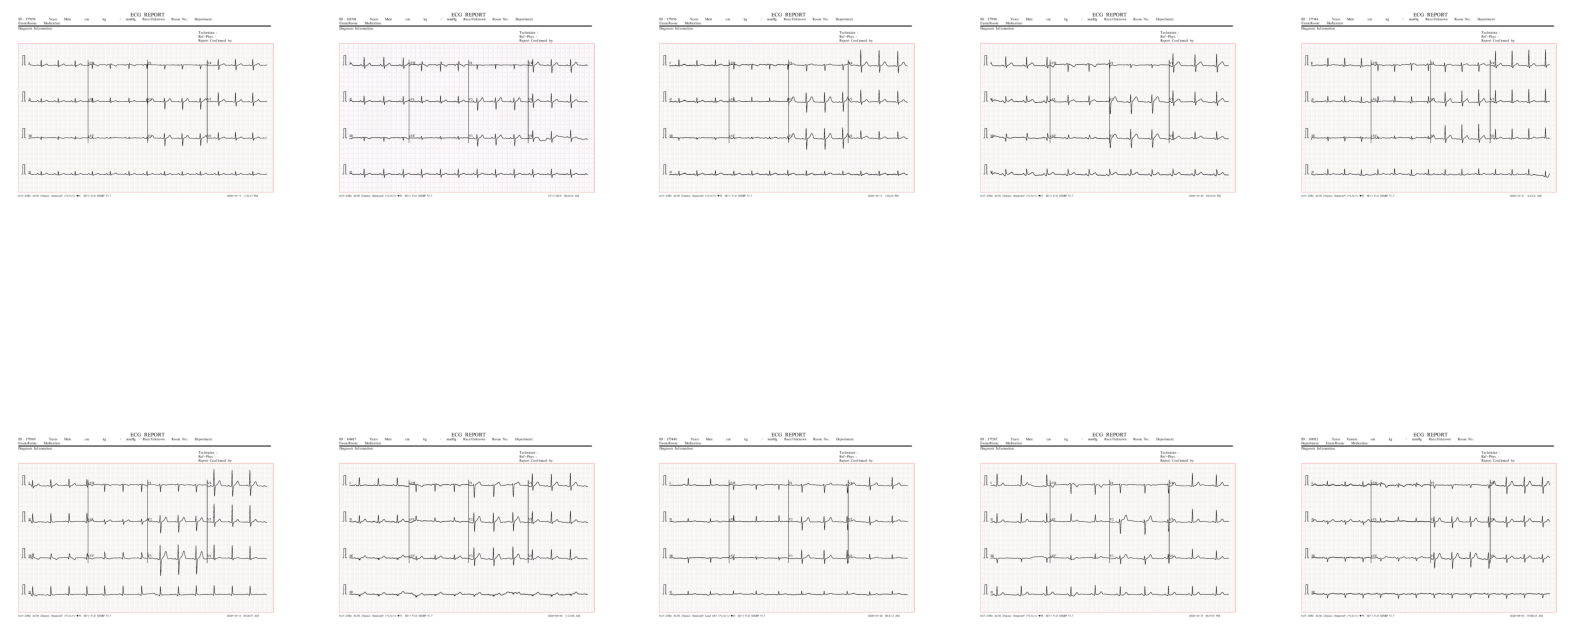


Showing 10 images from ECG Images of Myocardial Infarction Patients (240x12=2880):


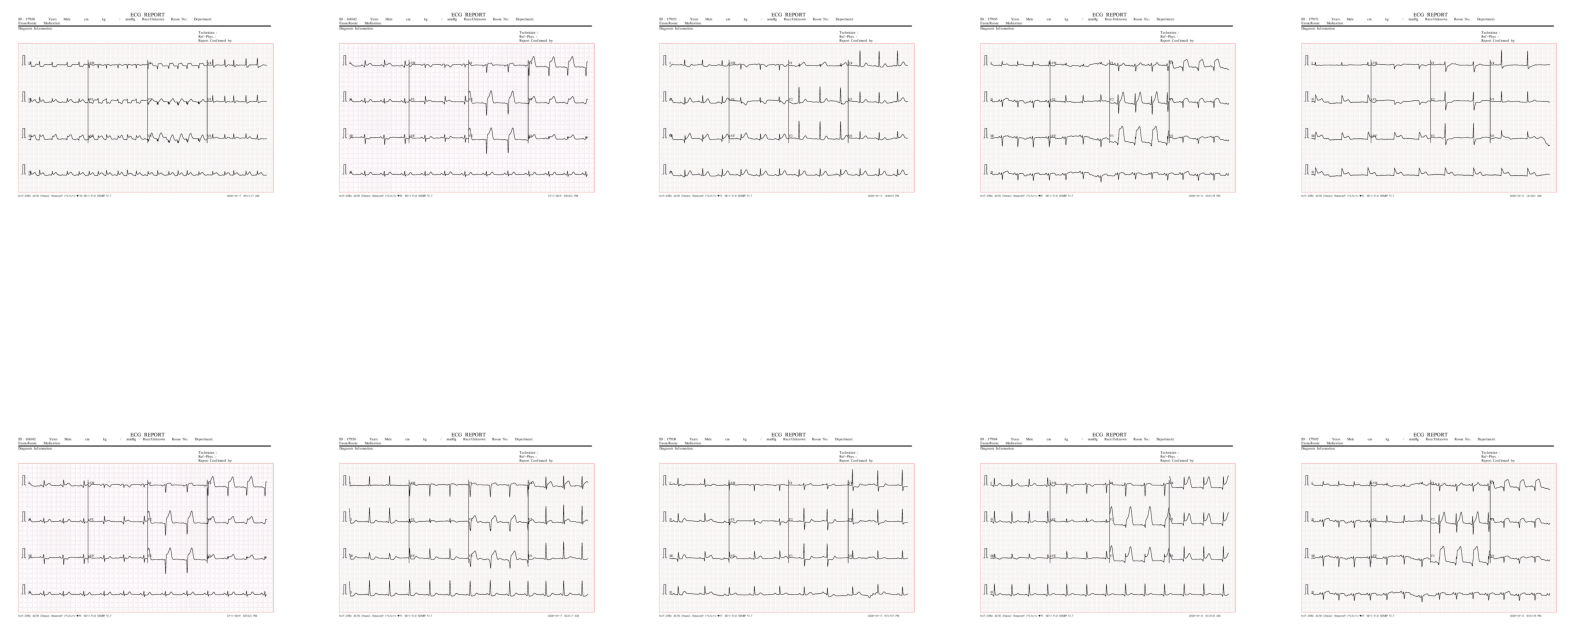

In [7]:
plot_images_from_subfolders(train_dir, train_subfolders)


Showing 10 images from ECG Images of Patient that have abnormal heartbeat (233x12=2796):


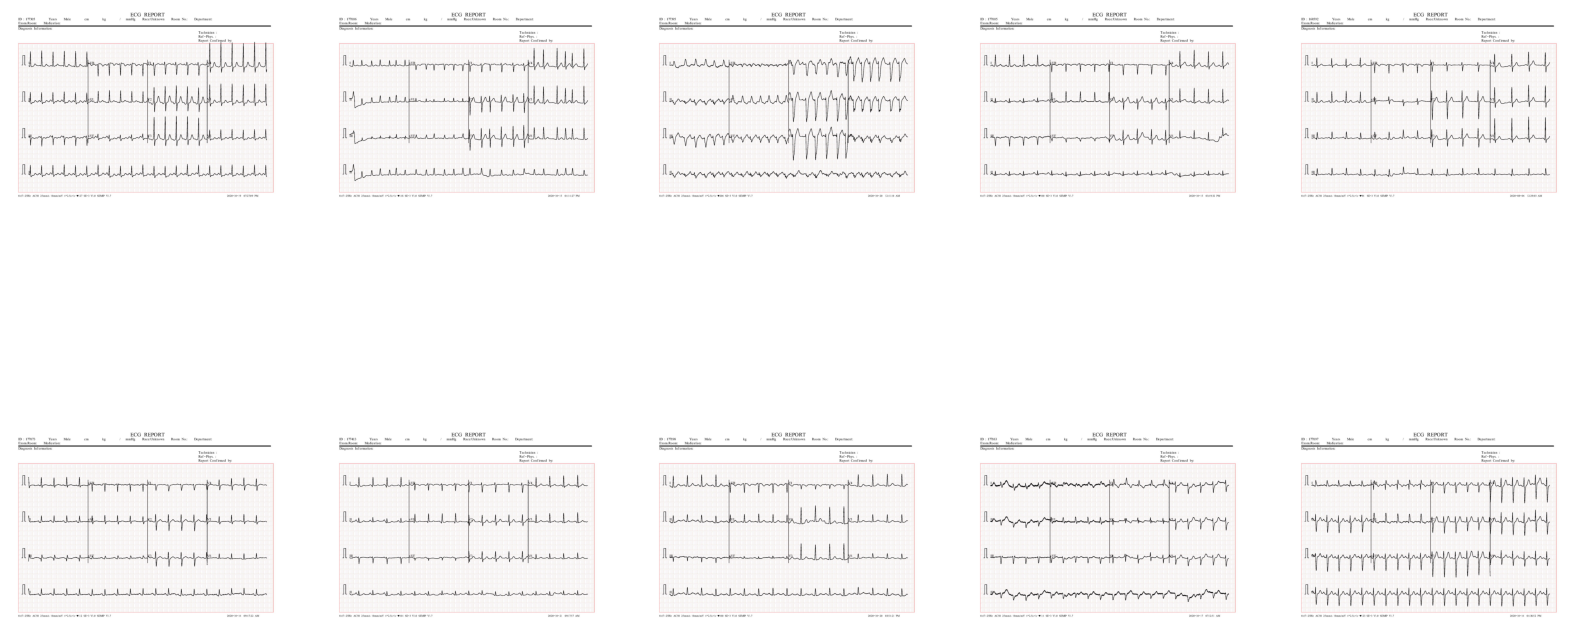


Showing 10 images from ECG Images of Patient that have History of MI (172x12=2064):


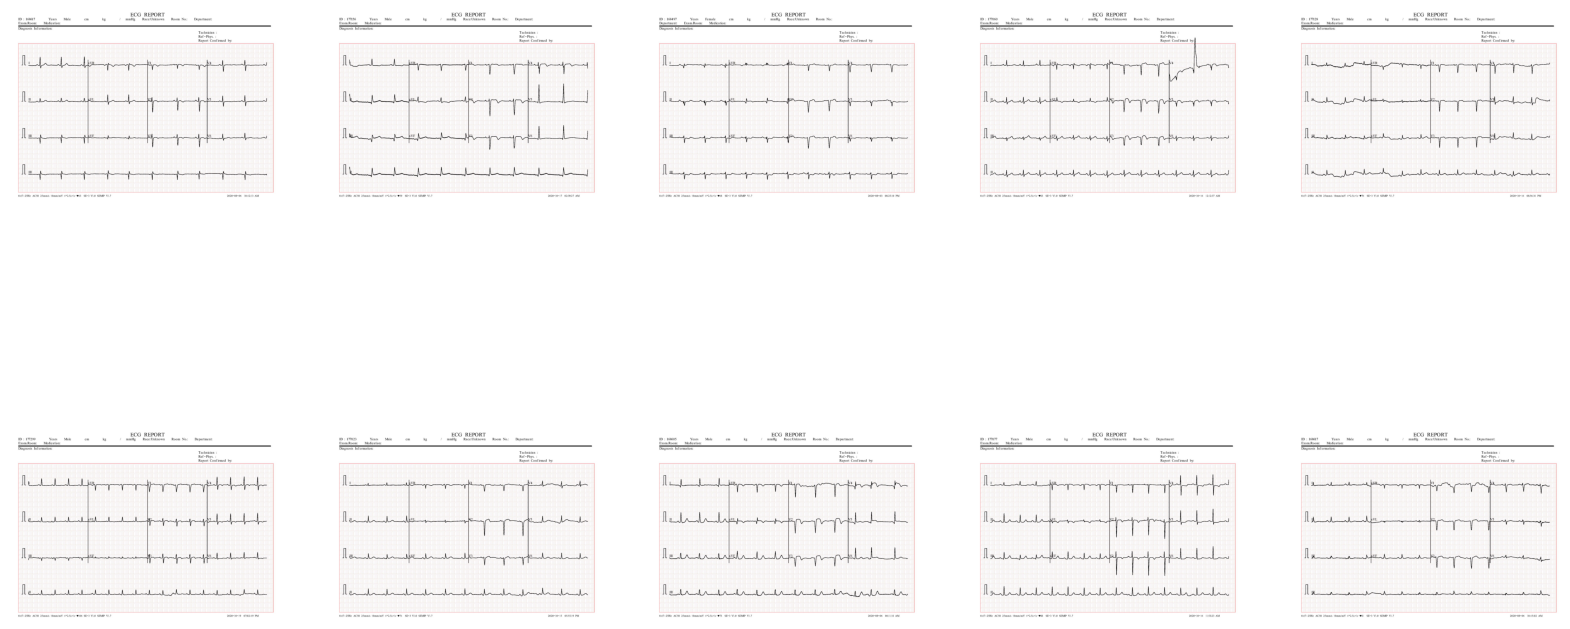


Showing 10 images from Normal Person ECG Images (284x12=3408):


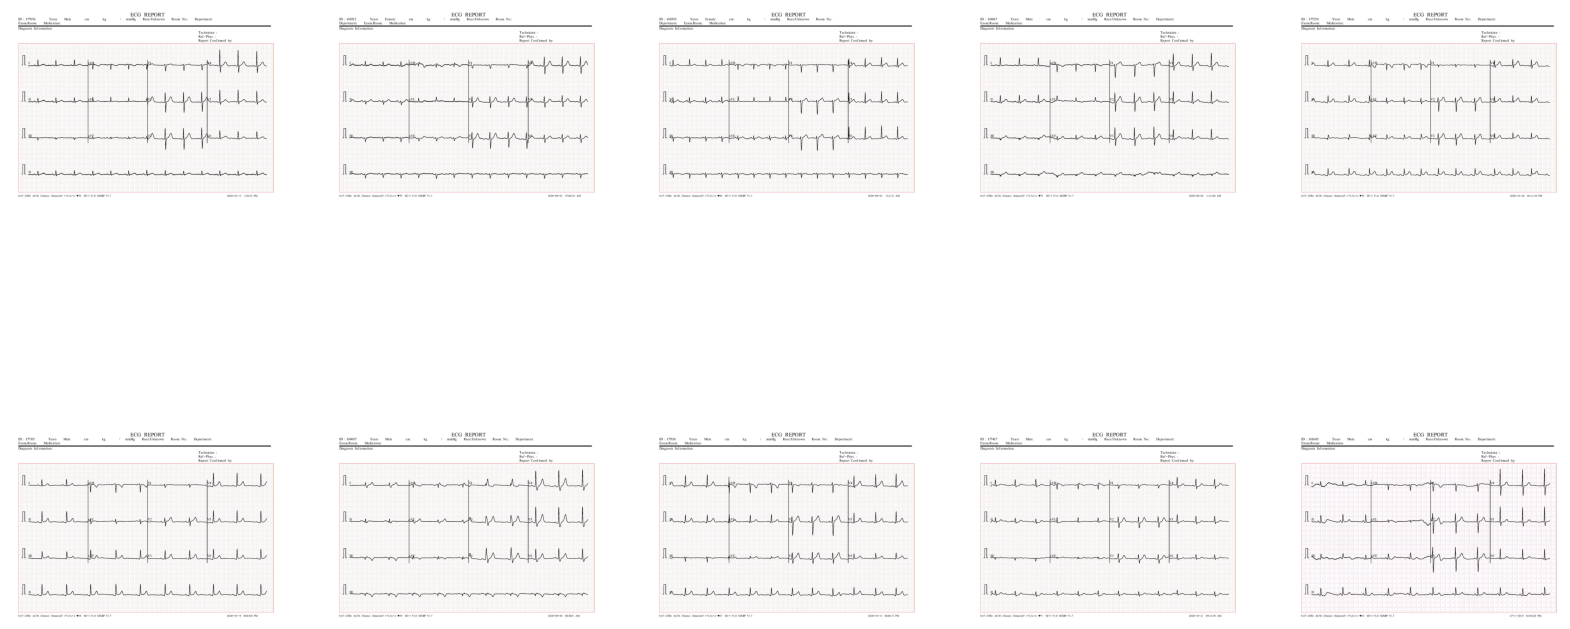


Showing 10 images from ECG Images of Myocardial Infarction Patients (240x12=2880):


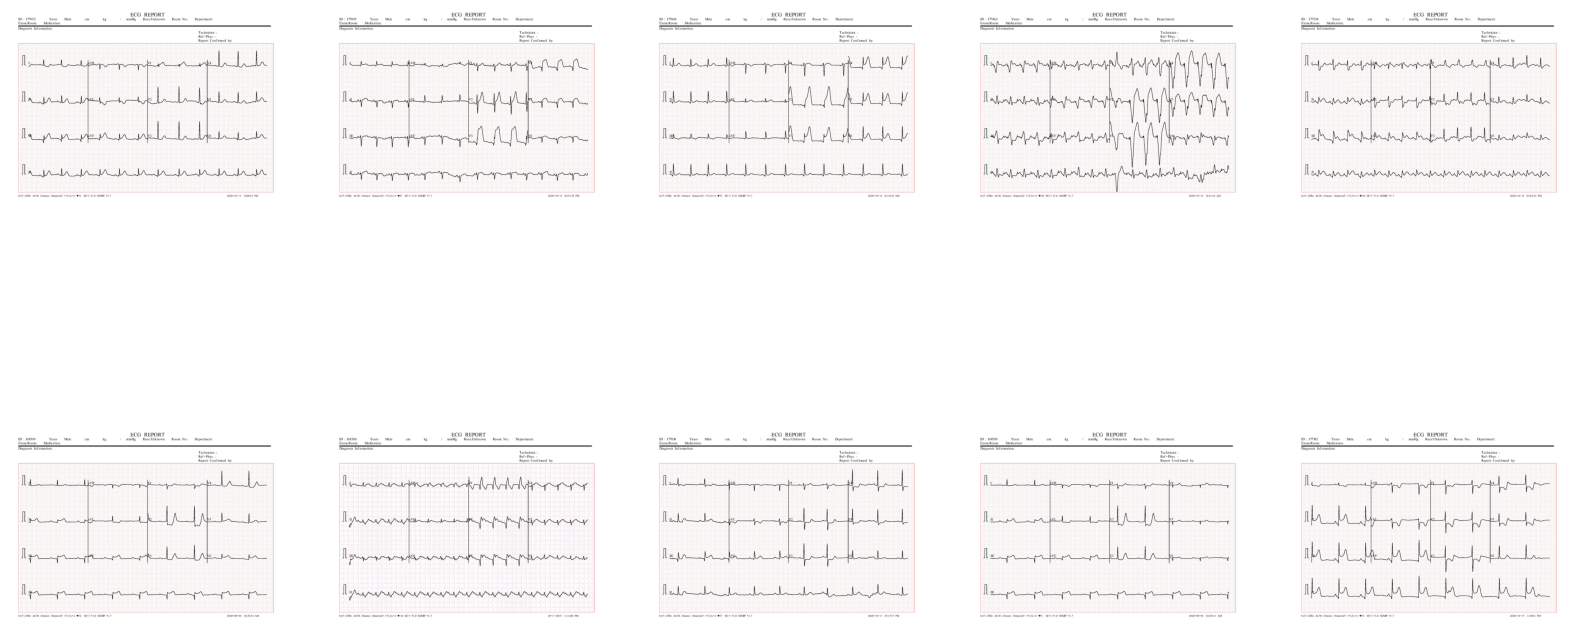

In [8]:
plot_images_from_subfolders(test_dir, test_subfolders)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-06-01 14:12:17.395869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748787137.696325      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748787137.784166      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Class indices:", train_generator.class_indices)

Found 2420 images belonging to 4 classes.
Found 603 images belonging to 4 classes.
Found 928 images belonging to 4 classes.
Class indices: {'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0, 'ECG Images of Patient that have History of MI (172x12=2064)': 1, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2, 'Normal Person ECG Images (284x12=3408)': 3}


In [11]:
import tensorflow as tf

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPUs are available and memory growth is set.")
    except RuntimeError as e:
        print(e)

2025-06-01 14:12:56.946771: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
from tensorflow.keras import layers, models

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.2986 - loss: 2.0450 - val_accuracy: 0.2361 - val_loss: 1.3711
Epoch 2/10
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:27 2s/step - accuracy: 0.3125 - loss: 1.3697

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - accuracy: 0.3125 - loss: 1.3697 - val_accuracy: 0.4167 - val_loss: 1.3629
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.3557 - loss: 1.3196 - val_accuracy: 0.6701 - val_loss: 0.9516
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 294ms/step - accuracy: 0.7188 - loss: 0.7861 - val_accuracy: 0.6042 - val_loss: 0.9600
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.7632 - loss: 0.6590 - val_accuracy: 0.9184 - val_loss: 0.2187
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 456ms/step - accuracy: 0.9062 - loss: 0.1690 - val_accuracy: 0.9306 - val_loss: 0.2185
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.9824 - loss: 0.0866 - val_accuracy: 0.9931 - val_loss: 0.0252
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 295ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.9931 - val_loss: 0.0300
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9995 - loss: 0.0078 - val_accuracy: 1.0000 - val_

In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 1.0000 - loss: 0.0018

Test Accuracy: 1.0


In [21]:
from tensorflow.keras.applications import VGG16

In [22]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [24]:
base_model = VGG16(
    weights='/kaggle/input/vgg16/other/default/1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top=False,
    input_shape=(224, 224, 3)
)


In [25]:
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  
])

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 883s 12s/step - accuracy: 0.3770 - loss: 2.0728 - val_accuracy: 0.7934 - val_loss: 0.7642
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7812 - loss: 0.7848 - val_accuracy: 0.8281 - val_loss: 0.8102
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 874s 12s/step - accuracy: 0.7637 - loss: 0.7372 - val_accuracy: 0.8559 - val_loss: 0.5031
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8125 - loss: 0.5198 - val_accuracy: 0.8333 - val_loss: 0.5175
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 871s 12s/step - accuracy: 0.8530 - loss: 0.4788 - val_accuracy: 0.9045 - val_loss: 0.3810
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.8750 - loss: 0.3703 - val_accuracy: 0.8924 - val_loss: 0.3649
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 873s 12s/step - accuracy: 0.8924 - loss: 0.3685 - val_accuracy: 0.9184 - val_loss: 0.2945
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8438 - loss: 0.3105 - val_accuracy: 0.9288

In [28]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 275s 9s/step - accuracy: 0.9323 - loss: 0.2688

Test Accuracy: 0.9375


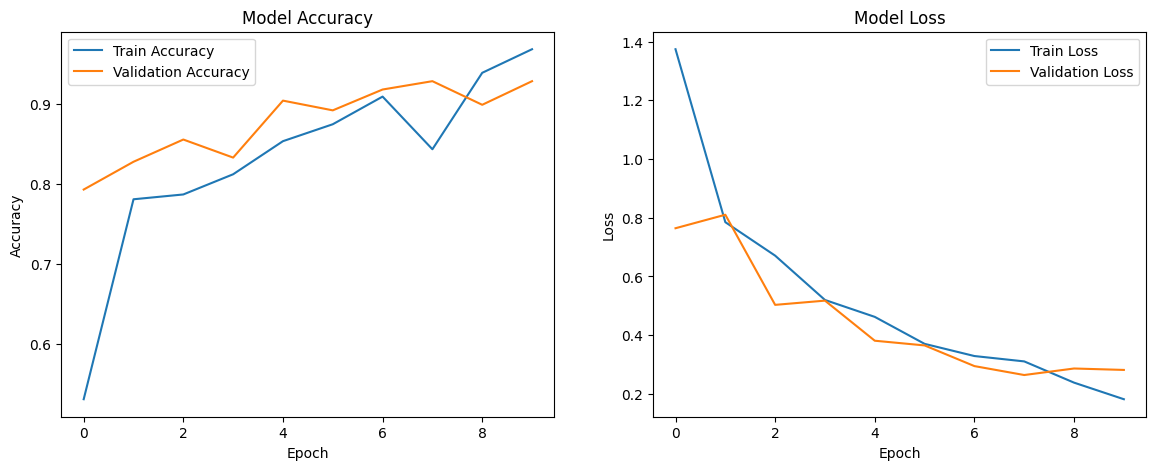

In [29]:
def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


In [30]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

30/30 ━━━━━━━━━━━━━━━━━━━━ 277s 9s/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[66 35 69 69]
 [40 37 48 47]
 [63 44 56 70]
 [78 60 78 68]]


In [34]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)


Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.27      0.28      0.27       239
     ECG Images of Patient that have History of MI (172x12=2064)       0.21      0.22      0.21       172
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.22      0.24      0.23       233
                          Normal Person ECG Images (284x12=3408)       0.27      0.24      0.25       284

                                                        accuracy                           0.24       928
                                                       macro avg       0.24      0.24      0.24       928
                                                    weighted avg       0.25      0.24      0.24       928



In [35]:
import seaborn as sns

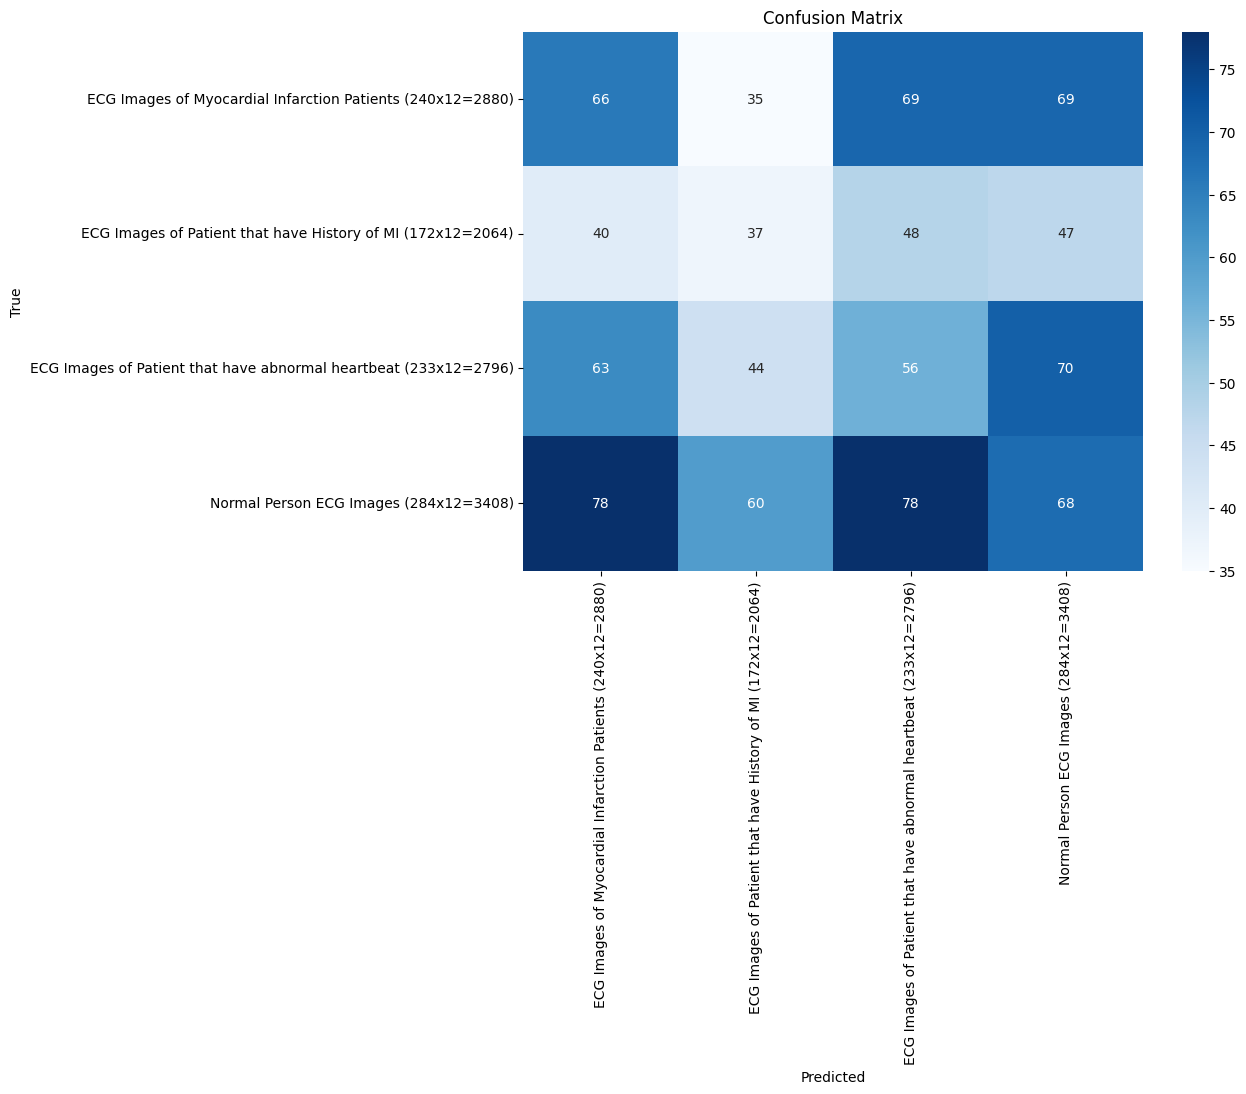

In [36]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, class_labels)

In [37]:
# Save the model in HDF5 format (recommended for Keras Sequential models)
model.save('ecg_vgg16_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


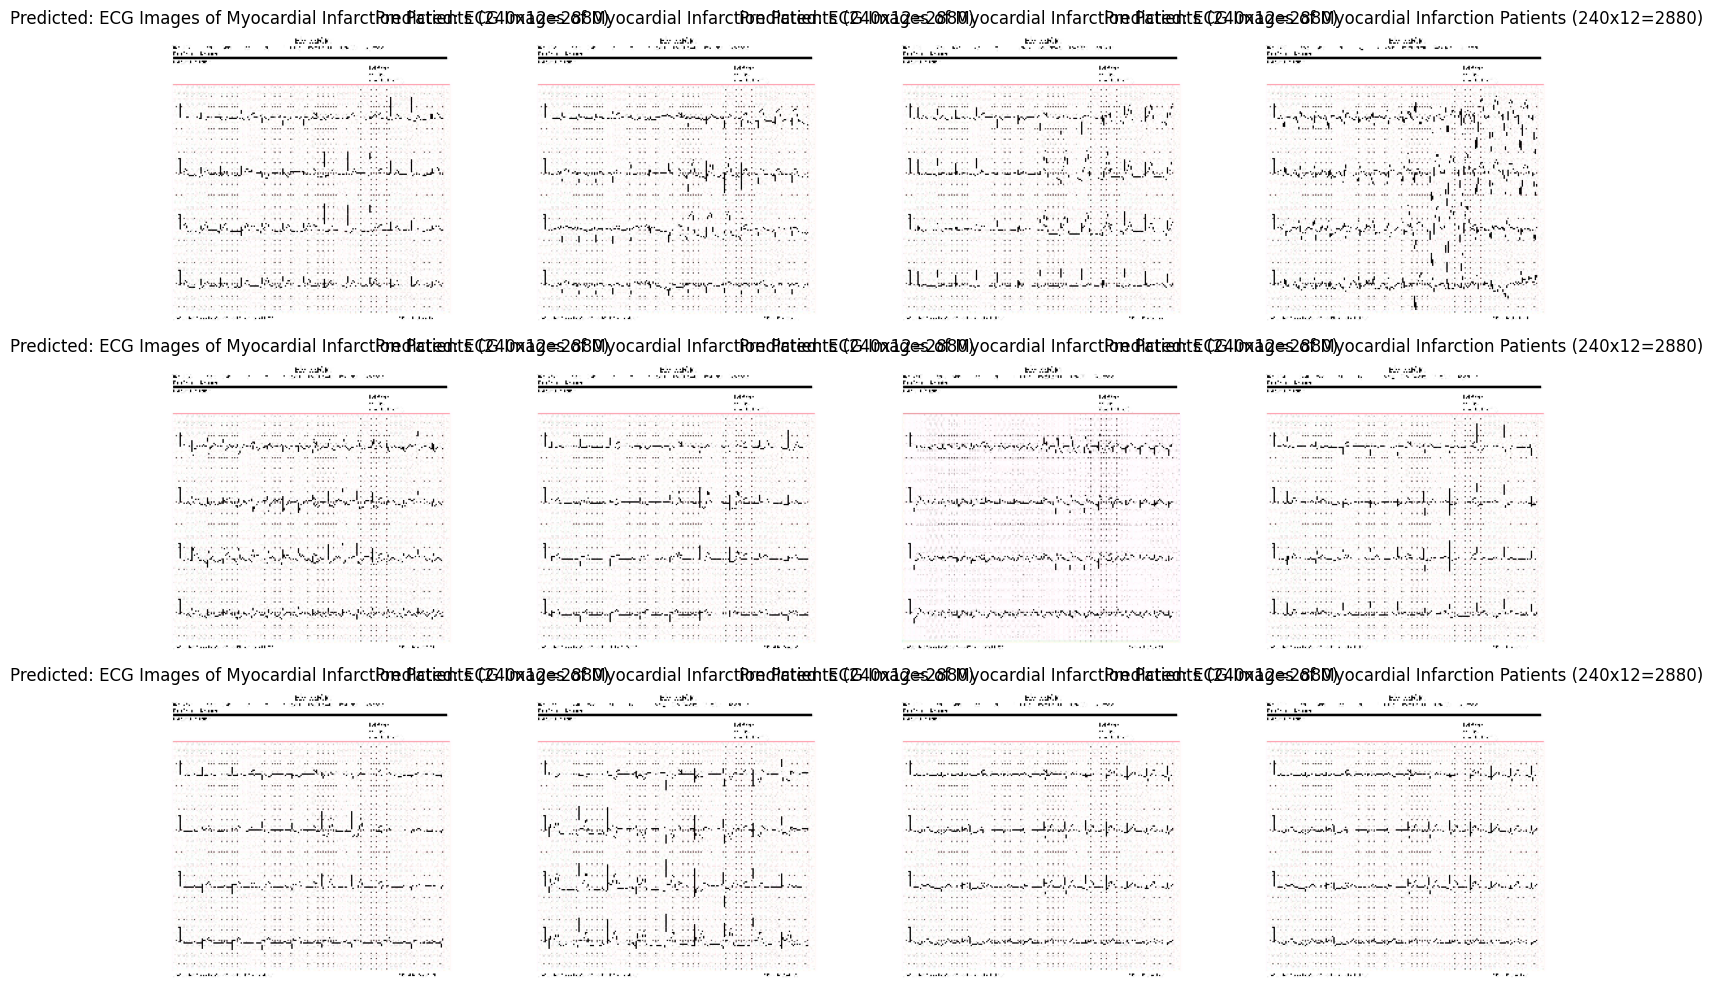

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('ecg_vgg16_model.h5')  # Replace with your saved model name

# Set test directory
test_dir = '/kaggle/input/ecg-analysis/ECG_DATA/test'  # Folder structure: test/class_name/image.jpg
img_size = (224, 224)  # As used in your VGG16 input_shape

# Get class names (same order as during training)
class_names = sorted(os.listdir(test_dir))

# Function to load and predict test images
def load_and_predict_images(test_dir, model, class_names, img_size=(224, 224), num_images=12):
    plt.figure(figsize=(15, 10))
    count = 0

    for label in class_names:
        label_path = os.path.join(test_dir, label)
        for image_name in os.listdir(label_path):
            if count >= num_images:
                break

            img_path = os.path.join(label_path, image_name)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            img_array_expanded = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array_expanded)
            predicted_class = class_names[np.argmax(prediction)]

            # Plot the image with predicted label
            plt.subplot(3, 4, count + 1)
            plt.imshow(img)
            plt.title(f"Predicted: {predicted_class}")
            plt.axis('off')
            count += 1

        if count >= num_images:
            break

    plt.tight_layout()
    plt.show()

# Run the prediction and visualization
load_and_predict_images(test_dir, model, class_names, img_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


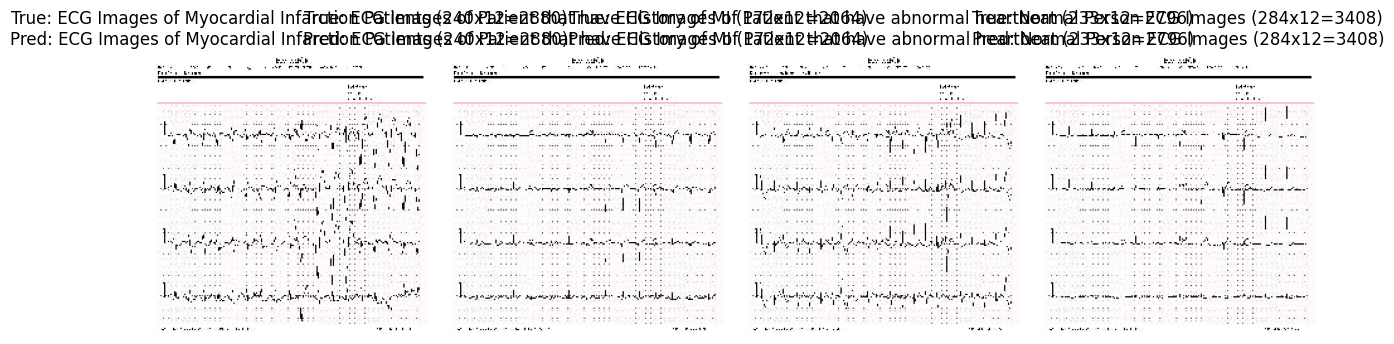

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('ecg_vgg16_model.h5')

# Set test directory
test_dir = '/kaggle/input/ecg-analysis/ECG_DATA/test'
img_size = (224, 224)

# Get class names
class_names = sorted(os.listdir(test_dir))

# Collect a few random test image paths
sample_paths = []
for label in class_names:
    label_path = os.path.join(test_dir, label)
    images = os.listdir(label_path)
    for img_name in random.sample(images, min(1, len(images))):  # 1 image per class
        sample_paths.append((os.path.join(label_path, img_name), label))

# Plot and predict a few images
plt.figure(figsize=(12, 6))
for idx, (img_path, true_label) in enumerate(sample_paths):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array_expanded)
    predicted_class = class_names[np.argmax(prediction)]

    # Plot
    plt.subplot(1, len(sample_paths), idx + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


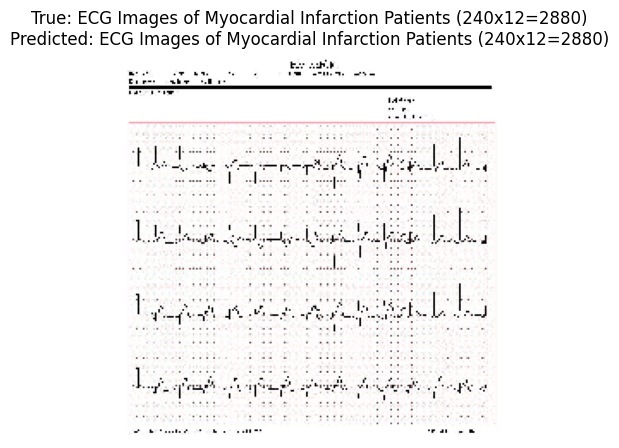

In [43]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('ecg_vgg16_model.h5')

# Set test directory
test_dir = '/kaggle/input/ecg-analysis/ECG_DATA/test'
img_size = (224, 224)

# Get class names
class_names = sorted(os.listdir(test_dir))

# Randomly select one class and one image from it
selected_class = random.choice(class_names)
class_path = os.path.join(test_dir, selected_class)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load and preprocess the image
img = load_img(image_path, target_size=img_size)
img_array = img_to_array(img) / 255.0
img_array_expanded = np.expand_dims(img_array, axis=0)

# Predict the class
prediction = model.predict(img_array_expanded)
predicted_class = class_names[np.argmax(prediction)]

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"True: {selected_class}\nPredicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


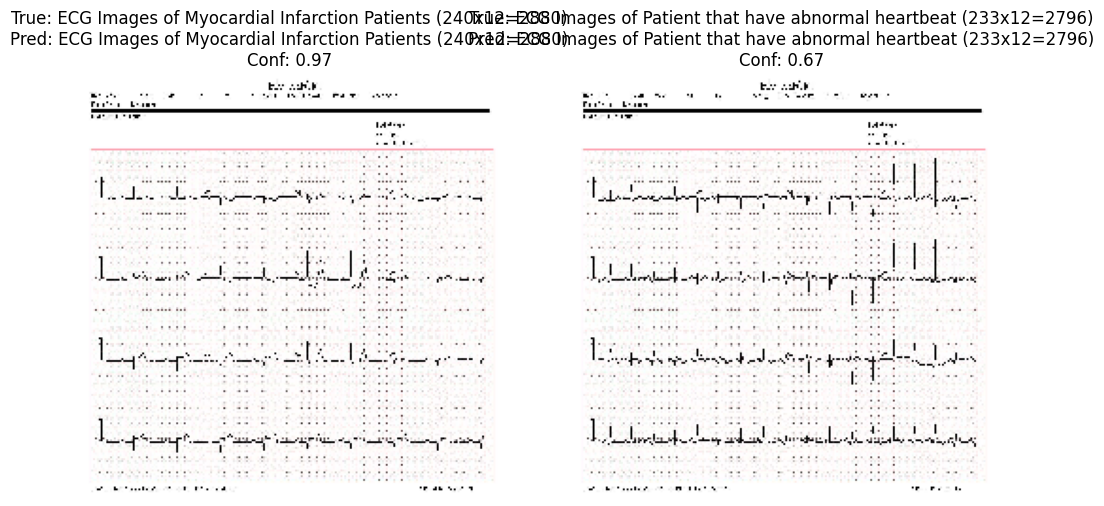

In [45]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('ecg_vgg16_model.h5')

# Set test directory
test_dir = '/kaggle/input/ecg-analysis/ECG_DATA/test'
img_size = (224, 224)

# Get class names
class_names = sorted(os.listdir(test_dir))

# Collect two random (image_path, true_label) pairs
samples = []
while len(samples) < 2:
    selected_class = random.choice(class_names)
    class_path = os.path.join(test_dir, selected_class)
    images = os.listdir(class_path)
    if images:
        image_name = random.choice(images)
        image_path = os.path.join(class_path, image_name)
        samples.append((image_path, selected_class))

# Plot and predict the two images
plt.figure(figsize=(10, 5))
for idx, (img_path, true_label) in enumerate(samples):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array_expanded)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Plot the image
    plt.subplot(1, 2, idx + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_class}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()
